# 建立自定义CNN模型训练识别图像中的猫和狗
# 网上下载图片进行预测

In [76]:
import numpy as np
print(np.__version__)  # 输出 1.20.0 及以上即可

2.1.3


In [77]:
# Load the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen= ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory('./data/dog_cat/train/',target_size=(50,50), batch_size=32, class_mode='binary')


Found 2023 images belonging to 2 classes.


In [78]:
# set up the CNN model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten,Input
model = Sequential([Input(shape=(50,50,3))])
#model.input_shape
# 卷积层
model.add(Conv2D(32,(3,3),activation='relu'))
# 池化层
model.add(MaxPool2D(pool_size=(2,2)))
# 卷积层
model.add(Conv2D(32,(3,3),activation='relu'))
# 池化层
model.add(MaxPool2D(pool_size=(2,2)))
# flattening layers
model.add(Flatten())
# FC layer
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 48, 48, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 22, 22, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 3872)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       495,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 506,017 (1.93 MB)

 Trainable params: 506,017 (1.93 MB)

 Non-trainable params: 0 (0.00 B)

In [79]:
# config the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 48, 48, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 22, 22, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 3872)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       495,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 506,017 (1.93 MB)

 Trainable params: 506,017 (1.93 MB)

 Non-trainable params: 0 (0.00 B)

In [80]:
# train the model
model.fit(training_set,epochs=50)

Epoch 1/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5067 - loss: 0.6975
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5635 - loss: 0.6793
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.6461 - loss: 0.6248
Epoch 4/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7049 - loss: 0.5681
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7237 - loss: 0.5346
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7612 - loss: 0.5083
Epoch 7/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7706 - loss: 0.4799
Epoch 8/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.8141 - loss: 0.4133
Epoch 9/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.8334 - loss: 0.3624
Epoch 10/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.8631 - loss: 0.3226
Epoch 11/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8715 - loss: 0.3012
Epoch 12/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy:

In [81]:
# accuracy of data
accuracy_train = model.evaluate(training_set)
print(accuracy_train)

64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 1.0000 - loss: 2.6577e-04
[0.0002657681761775166, 1.0]


In [82]:
# load single image
from keras.utils import load_img, img_to_array
import numpy as np
pic_dog = 'cat.jpg'
pic_dog = load_img(pic_dog,target_size=(50,50))
pic_dog = img_to_array(pic_dog)
pic_dog = pic_dog/255
pic_dog = pic_dog.reshape(1,50,50,3)

result = model.predict(pic_dog)
result=np.argmax(result,axis=1)
print(result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[0]


In [83]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
[[0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
[[0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
[[1.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
[[1.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
[[0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
[[0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
[[0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
[[0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
[[0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
[[1.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
[[1.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
[[1.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
[[1.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
[[1.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
[[1.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
[[1.]]


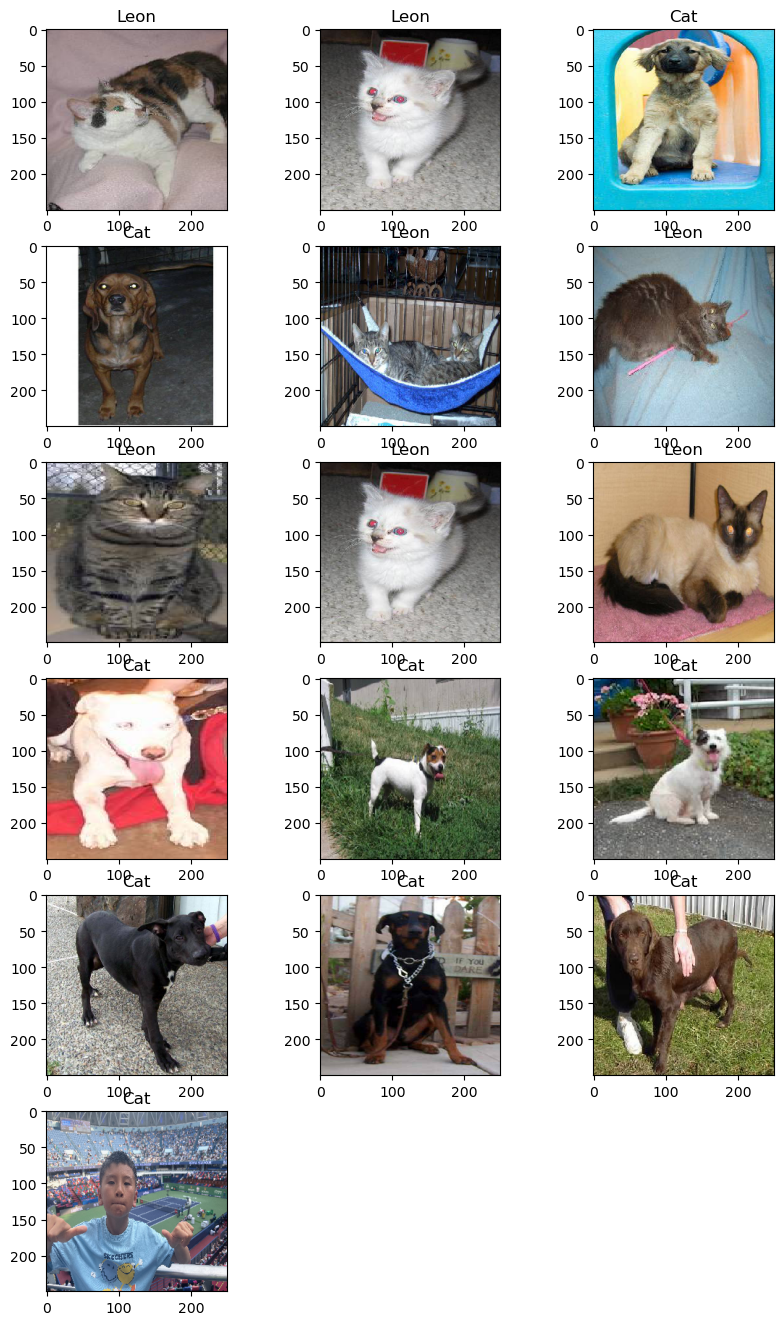

In [84]:
# predict on multiple images
import matplotlib as mlp
from matplotlib import pyplot as plt
from matplotlib.image import imread
from keras.utils import load_img, img_to_array
from keras.models import load_model
a = [i for i in range(1,17)]
fig = plt.figure(figsize=(10,140))
for i in a:
    img_name = './data/dog_cat/test/'+ str(i) + '.jpg'
    img_ori = load_img(img_name,target_size=(50,50))
    img = img_to_array(img_ori)
    img = img/255
    img = img.reshape(1,50,50,3)
    result = model.predict(img)
    result = np.round(result)
    img_ori = load_img(img_name,target_size=(250,250))
    plt.subplot(50,3,i)
    plt.imshow(img_ori)
    print(result)
    #plt.title(result)
    plt.title('Cat' if result[0] == 1 
        else 'Dog' if result[0] == 2 
        else 'Leon' if result[0] == 0 
        else 'Unknown')
plt.show()